In [ ]:
"""
This Jupyter Notebook is used to test the SVMBDT implementation for the Samson dataset. 
It also test different other ML algortithms from the function SingleMachineLearningTest(). 
The labeled figures are store on the folder /Results/Samson_Results and the results are printed in the console. 
"""

In [1]:
#Imports 
import pip
import glob, os
from sklearn import svm 
import scipy.io as sc
import numpy as np
from HelperFunctions_ import write_dataset_to_file, split_dataset_paths, subFrame,preprocessing_data, newColorLabels
from HelperFunctions_ import  combinePictures, classesInLabels, combineLabelClasses, lessBands, reshape_sj, SingleMachineLearningTest
from SVMBDT import SvmDesionTreeTrain, SvmDesionTreePredict, RetrieveSubData, CombineMultiBranch, MeanAccuracy, SupportVectorsSvmBranches, TotalAndMeanSupportVectors
from spectral import *
import pylab
import tables as tab
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn import datasets
import copy
import spectral
import tables as ta
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
import time




In [2]:
samson_data = split_dataset_paths("../Datasets/samson/", ["mat"])

samson = sc.loadmat(samson_data["mat"][1])["V"]
samson_gt = sc.loadmat(samson_data["mat"][0])
samson_labels = np.argmax(samson_gt['A'].T.reshape((-1,3)), axis=1)

In [3]:
new_cube = np.zeros((95,95,3))
new_cube[:,:,0] = np.array(samson[32]).reshape(95,95)
new_cube[:,:,1] = np.array(samson[45]).reshape(95,95)
new_cube[:,:,2] = np.array(samson[56]).reshape(95,95)
new_cube /= new_cube.max()/2
new_cube[new_cube > 1 ] = 1

plt.imshow(new_cube)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_Data", dpi = 300, bbox_inches="tight")
plt.close()

In [4]:
samson = reshape_sj(copy.deepcopy(samson))

X = samson.transpose(0,2,1).reshape((-1,156))
X = preprocessing.scale(X, axis=0)
y = samson_labels.flatten()

# split samson into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.95, random_state=1)

In [5]:
print(len(X[0]))

156


The training time is: 0.065 sec.
The first branch: 0.002
The prediction time is: 0.019 sec.
Samson : Linear SMVBDT
Total Accuracy:  98.327 %


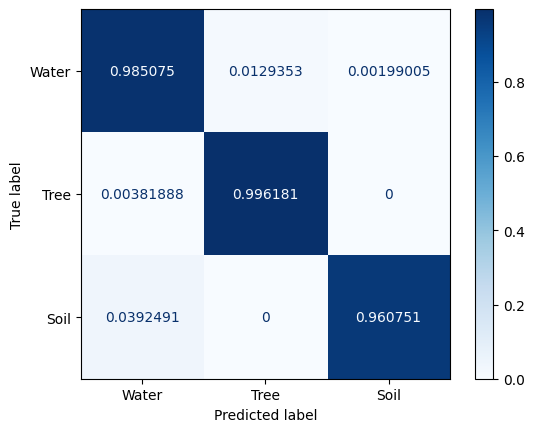

In [6]:
#Samson Linear SVMBDT 

samson_tree = {0: [[2],[0,1]], 1: [[],[[0],[1]]]}

iter = 1e6

#samson_svm_tree = {0: LinearSVC(class_weight= "balanced", max_iter=iter), 
#                  1 : [False,LinearSVC(class_weight= "balanced", max_iter=iter)]}

samson_svm_tree = {0: LinearSVC(class_weight= "balanced", max_iter=iter), 
                  1 : [False,LinearSVC(class_weight= "balanced", max_iter=iter)]}

svm_tree_branch, data_and_labels_branches = SvmDesionTreeTrain(X_train, y_train, samson_tree, samson_svm_tree, sub_data=1)

predicted_label, sub_data_branch, predicted_branch_labels = SvmDesionTreePredict(X, svm_tree_branch, samson_tree, sub_data = 1)

total_accuracy = (predicted_label == y).sum()/len(y)

print("Samson : Linear SMVBDT")

print("Total Accuracy: ", str(round(100*total_accuracy,3)), "%")

try: 
    mean_accuracy = MeanAccuracy(data_and_labels_branches, predicted_branch_labels)

    print("Mean Accuracy: ", str(round(100*mean_accuracy,3)), "%")

except: 
    None


try:        
    samson_support_vectors = SupportVectorsSvmBranches(svm_tree_branch)

    samson_total_vectors, samson_mean_vectors = TotalAndMeanSupportVectors(samson_support_vectors)

    print("Total Support Vectors: " + str(samson_total_vectors))

    print("Mean Support Vectors: " + str(samson_mean_vectors))

except: 
    None

#1 Road, 2# Soil, #3, Water, #4 Three

name_classes = ["Water", "Tree", "Soil"]

cm = confusion_matrix(y,predicted_label, normalize="true") 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=name_classes)
disp = cmd_obj.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()


In [8]:
samson_color_label = {0 : [210, 125, 45], 1 : [34,139,34], 2 : [0,191,255]}
samson_classes = ["Water", "Tree", "Soil"]

shape = int(np.sqrt(len(predicted_label)))

predicted_label_color = newColorLabels(predicted_label,shape,shape,samson_color_label)

plt.imshow(predicted_label_color)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_SVMBDT", dpi = 300, bbox_inches="tight")
plt.close()

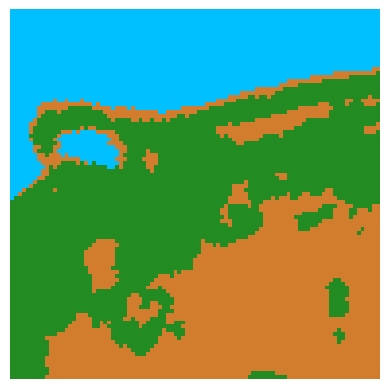

In [10]:
shape = int(np.sqrt(len(y)))

y_color = newColorLabels(y,shape,shape,samson_color_label)

plt.imshow(y_color)
plt.axis('off')
plt.show()


In [11]:
linear_ovo_yout, linear_ovr_yout, rbf_yout, kmeans_yout, knearest_yout,random_forest_yout = SingleMachineLearningTest(X,y,X_train, y_train,1e6,3)

Linear 1-vs-1 Training Time: 0.002sec.
Linear 1-vs-Rest Training Time: 0.127sec.
RBF Training Time: 0.003sec.
Kmeans Training Time: 0.125sec.
KNearestNeighbor Training Time: 0.0sec.
Random Forest Training Time: 0.169sec.
Linear 1-vs-1 Predict Time: 0.015sec.
Linear 1-vs-Rest Predict Time: 0.004sec.
RBF Predict Time: 0.351sec.
KMeans Predict Time: 0.004sec.
KNearestNeighbor Predict Time: 0.237sec.
Random Forest Predict Time: 0.047sec.
Linear 1-vs-1 Accuracy: 98.69%
Linear 1-vs-Rest Accuracy: 97.35000000000001%
RBF Accuracy: 94.77%
KMeans Accuracy: 10.79%
KNearestNeighbour Accuracy: 96.39999999999999%
Random Forest Accuracy: 96.39999999999999%
Linear 1-vs-1 Total SVM Support_Vectors : 38
RBF Total SVM Support_Vectors : 95
Linear 1-vs-1 Average SVM Support_Vectors : 12.667
RBF Average SVM Support_Vectors : 31.667


In [13]:
samson_color_label = {0 : [210, 125, 45], 1 : [34,139,34], 2 : [0,191,255]}
t=1
cmap = {0:[0.17647059,0.49019608,0.82352941,t],1:[0.13333333,0.54509804,0.13333333,t],2:[1.0,0.5,0.1,t]}
samson_classes = {0: "Water", 1: "Tree", 2: "Soil"}

hape = int(np.sqrt(len(y)))

yout_color = newColorLabels(y,shape,shape,samson_color_label)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

patches = [mpatches.Patch(color=cmap[i], label=samson_classes[i]) for i in samson_color_label] 

plt.imshow(yout_color)
plt.axis('off')
#plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.savefig("../Results/Samson_Results/Samson_GT", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_30684\958776504.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Samson_Results/Samson_GT", dpi = 300, bbox_inches="tight")


In [19]:
figLegend = pylab.figure(figsize = (1.05,0.8))
figLegend.legend(handles=patches,loc = 'upper left')
figLegend.savefig("../Results/Samson_Results/Samson_Classes", dpi=500)

<Figure size 105x80 with 0 Axes>

In [ ]:
shape = int(np.sqrt(len(linear_ovo_yout)))

linear_ovo_yout_color = newColorLabels(linear_ovo_yout,shape,samson_color_label)

plt.imshow(linear_ovo_yout_color)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_linear_ovo", dpi = 300, bbox_inches="tight")
plt.close()


C:\Users\jonas\AppData\Local\Temp\ipykernel_23236\2997796198.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Samson_Results/Samson_linear_ovo", dpi = 300, bbox_inches="tight")


In [ ]:
shape = int(np.sqrt(len(linear_ovr_yout)))

linear_ovr_yout_color = newColorLabels(linear_ovr_yout,shape,samson_color_label)

plt.imshow(linear_ovr_yout_color)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_linear_ovr", dpi = 300, bbox_inches="tight")
plt.close()


C:\Users\jonas\AppData\Local\Temp\ipykernel_23236\661482393.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Samson_Results/Samson_linear_ovr", dpi = 300, bbox_inches="tight")


In [ ]:
shape = int(np.sqrt(len(rbf_yout)))

rbf_yout_color = newColorLabels(rbf_yout,shape,samson_color_label)

plt.imshow(rbf_yout_color)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_RBF", dpi = 300, bbox_inches="tight")
plt.close()


C:\Users\jonas\AppData\Local\Temp\ipykernel_23236\379964382.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Samson_Results/Samson_RBF", dpi = 300, bbox_inches="tight")


In [ ]:
shape = int(np.sqrt(len(knearest_yout)))

knearest_yout_color = newColorLabels(knearest_yout,shape,samson_color_label)

plt.imshow(knearest_yout_color)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_KNN", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_23236\1983399335.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Samson_Results/Samson_KNN", dpi = 300, bbox_inches="tight")


In [ ]:
shape = int(np.sqrt(len(random_forest_yout)))

knearest_yout_color = newColorLabels(random_forest_yout,shape,samson_color_label)

plt.imshow(knearest_yout_color)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_RF", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_23236\4105297436.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Samson_Results/Samson_RF", dpi = 300, bbox_inches="tight")


In [ ]:
shape = int(np.sqrt(len(kmeans_yout)))
samson_color_label = {2 : [210, 125, 45], 0 : [34,139,34], 1 : [0,191,255]}

kmeans_yout_color = newColorLabels(kmeans_yout,shape,samson_color_label)

plt.imshow(kmeans_yout_color)
plt.axis('off')
plt.savefig("../Results/Samson_Results/Samson_KM", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_23236\2994635386.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Samson_Results/Samson_KM", dpi = 300, bbox_inches="tight")
